In [ ]:
!pip install --upgrade "tensorflow>=1.15,<2.0"
!pip install --upgrade "tensorflow-gpu>=1.15,<2.0"
!pip install tqdm
!pip install --upgrade tensorflow-hub

Requirement already up-to-date: tensorflow<2.0,>=1.15 in /usr/local/lib/python3.6/dist-packages (1.15.3)
Requirement already up-to-date: tensorflow-gpu<2.0,>=1.15 in /usr/local/lib/python3.6/dist-packages (1.15.3)
Requirement already up-to-date: tensorflow-hub in /usr/local/lib/python3.6/dist-packages (0.8.0)


In [ ]:
import os
import math
import datetime
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import spacy
import pickle
from tqdm.notebook import tqdm
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
pd.set_option('display.max_colwidth', 200)

In [ ]:
!gdown --id 19WPpy54EHgGb8vxY6mqj_JDlX0Zc-RsI --output data.csv

Downloading...
From: https://drive.google.com/uc?id=19WPpy54EHgGb8vxY6mqj_JDlX0Zc-RsI
To: /content/data.csv
1.35GB [00:06, 196MB/s]


In [ ]:
dataframe = pd.read_csv("data.csv")
final_dataframe = dataframe[:200]
data_split = 0.2
train, test = train_test_split(final_dataframe, test_size=data_split)

In [ ]:
train.head()

,rating,title,review
194,5,"The best book in the ""Night World"" Series","daughter of Darkness be quite possibly the good book in the new NIGHT WORLD series by L. J. Smith . -PRON- do not just revolve around one supernatural being or one singular person , -PRON- have in..."
146,5,Telling it like it is!,the book come within 5 day yeah ! ! ! -PRON- be in perfect condition . this be a great read !
190,5,"The best of the ""Night World"" series","-PRON- love this book very much!It be excellent . -PRON- absoloutly fall in love with Jeremy . -PRON- be such a sweet , nice guy . -PRON- think -PRON- be unfair that -PRON- die . the last few time..."
31,2,DVD Player crapped out after one year,"-PRON- also begin have the incorrect disc problem that -PRON- have read about on here . the VCR still work , but hte dvd side be useless . -PRON- understand that dvd player sometimes just quit on ..."
112,2,no technical information,this book be a great over view of the joint use in building but have no information on beam span or load to actually build a building


Total Reviews:  160


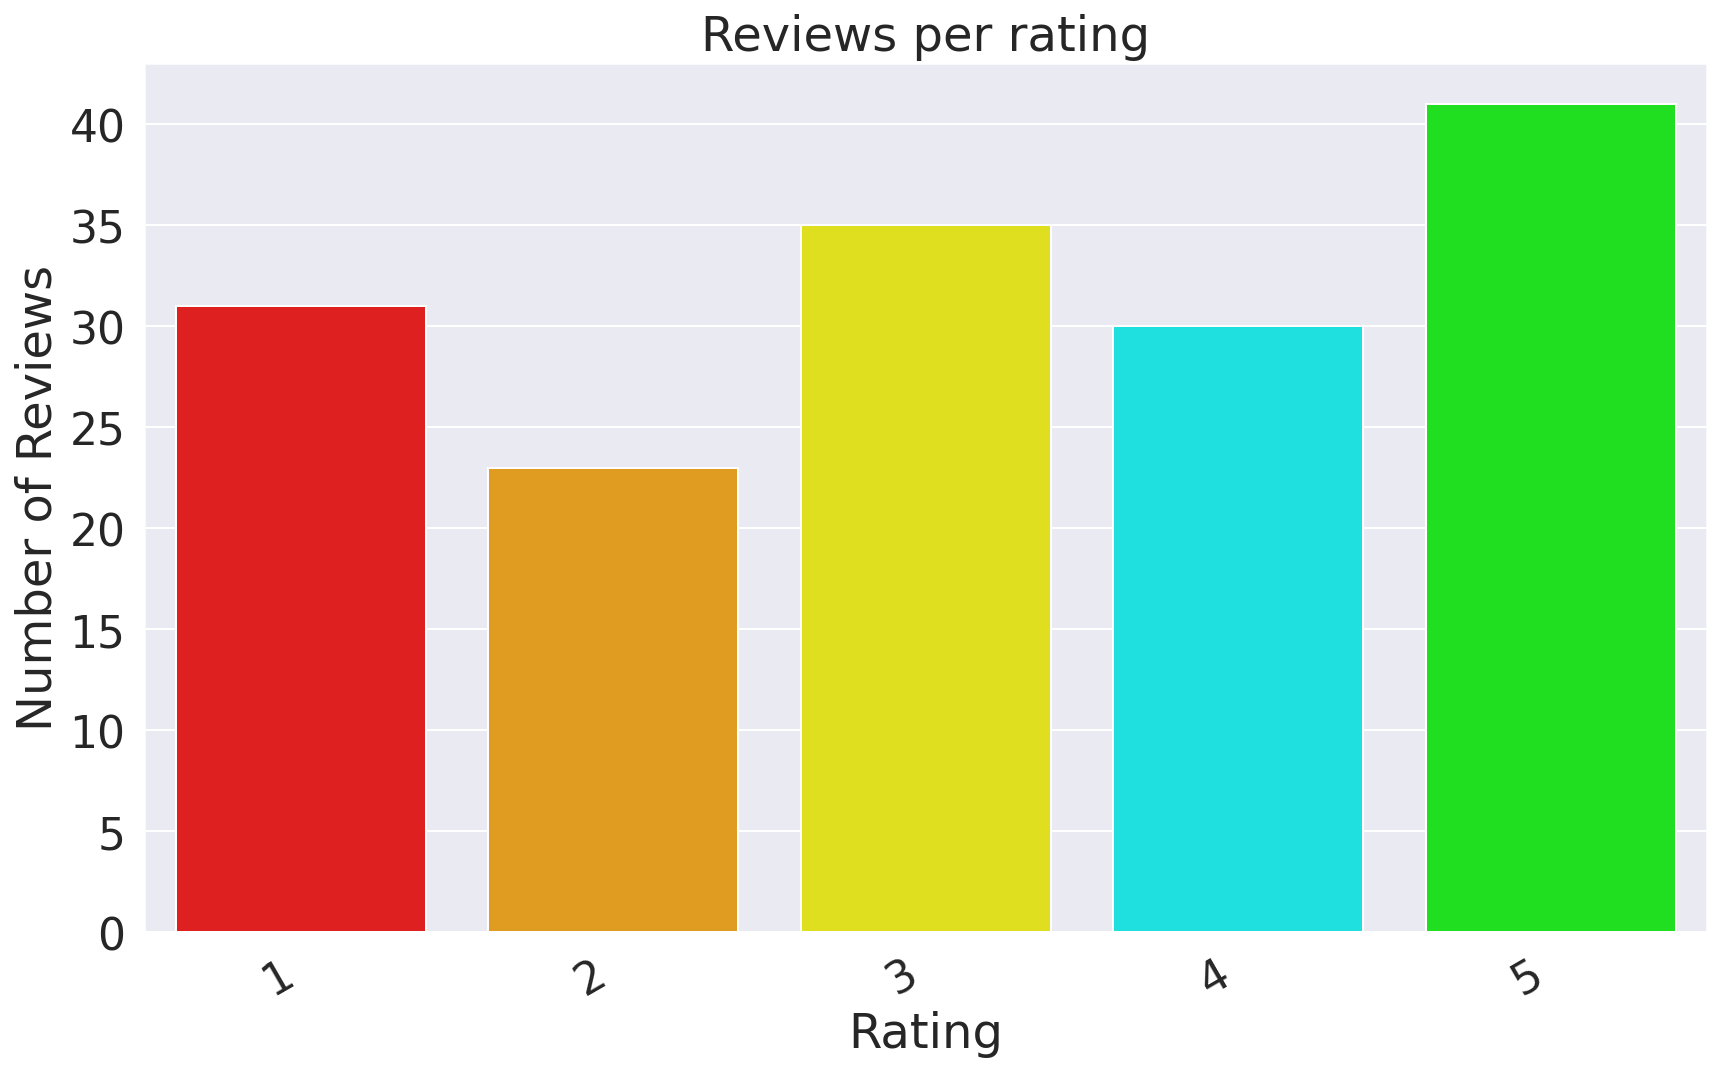

In [ ]:
sns.set(font_scale=2, rc={'figure.figsize':(14,8)})
sns.set_palette(sns.color_palette(["#FF0000", "#FFA500", "#FFFF00", "#00FFFF", "#00FF00"]))
chart = sns.countplot(train.rating)
plt.title("Reviews per rating")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set(xlabel= "Rating", ylabel="Number of Reviews")

total_reviews = len(train.rating)
print("Total Reviews: ", total_reviews)

In [ ]:
def process_data(data):
  punctuation = '!"#$%&()*+-/:;<=>?@[\\]^_`{|}~'
  data = data.apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))
  data = data.str.lower()
  data = data.str.replace("[0-9]", " ")
  data = data.apply(lambda x:' '.join(x.split()))

In [ ]:
#train['review'] = process_data(train['review'])
#test['review'] = process_data(test['review'])

punctuation = '!"#$%&()*+-/:;<=>?@[\\]^_`{|}~'

train['review'] = train['review'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))
test['review'] = test['review'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))

# convert text to lowercase
train['review'] = train['review'].str.lower()
test['review'] = test['review'].str.lower()

# remove numbers
train['review'] = train['review'].str.replace("[0-9]", " ")
test['review'] = test['review'].str.replace("[0-9]", " ")

# remove whitespaces
train['review'] = train['review'].apply(lambda x:' '.join(x.split()))
test['review'] = test['review'].apply(lambda x: ' '.join(x.split()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
# import spaCy's language model
nlp = spacy.load('en', disable=['parser', 'ner'])

# function to lemmatize text
def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output

In [ ]:
train['review'] = lemmatization(train['review'])
test['review'] = lemmatization(test['review'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

In [ ]:
x = ["Amazing! Loved this so much! Very Happy."]

embeddings = elmo(x, signature="default", as_dict=True)["elmo"]
embeddings.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


TensorShape([Dimension(1), Dimension(7), Dimension(1024)])

In [ ]:
train.head()

AttributeError: ignored

In [ ]:
def elmo_vectors(x):
  embeddings = elmo(x.tolist(), signature="default", as_dict=True)["elmo"]
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

In [ ]:
list_train = [train[i:i+100] for i in range(0,train.shape[0],100)]
list_test = [test[i:i+100] for i in range(0,test.shape[0],100)]

['daughter of darkness be quite possibly the good book in the new night world series by l. j. smith . pron do not just revolve around one supernatural being or one singular person , pron have interesting information on the werewolf of the night world and the plot line be out of sight . pron own all of the book in the series up untill soulmate that be and so far daughter of darkness be the good one . pron only hope the follow book in this wonderful series be as great as this one', 'the book come within day yeah pron be in perfect condition . this be a great read', 'pron love this book very muchit be excellent . pron absoloutly fall in love with jeremy . pron be such a sweet , nice guy . pron think pron be unfair that pron die . the last few time pron read this book pron have tear stream down pron face . pron really do not think pron be crazy just misunderstood . this be a must read book . once pron pick pron up pron can not put pron down .', 'pron also begin have the incorrect disc prob

In [ ]:
#for p in list_train:
#  print(p)

elmo_train = [elmo_vectors(x['review']); print(x.tolist()) ]
elmo_test = [elmo_vectors(x['review']) for x in list_test]

['daughter of darkness be quite possibly the good book in the new night world series by l. j. smith . pron do not just revolve around one supernatural being or one singular person , pron have interesting information on the werewolf of the night world and the plot line be out of sight . pron own all of the book in the series up untill soulmate that be and so far daughter of darkness be the good one . pron only hope the follow book in this wonderful series be as great as this one', 'the book come within day yeah pron be in perfect condition . this be a great read', 'pron love this book very muchit be excellent . pron absoloutly fall in love with jeremy . pron be such a sweet , nice guy . pron think pron be unfair that pron die . the last few time pron read this book pron have tear stream down pron face . pron really do not think pron be crazy just misunderstood . this be a must read book . once pron pick pron up pron can not put pron down .', 'pron also begin have the incorrect disc prob

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


['pron do not know this be the audio cd of the game , pron think pron could be use on the playstation . maybe the other guy be from the us or somewhere where pron be actually easy to get the game , and play pron , but this be all in japanese and be not compatible with pron machine . pron be deeply disappointed as i love the arcade game , but the dance stage euromix dance dance revolution equivalent be lack in decent track , many be jungle y and be difficult to dance to pron . also , most of these track be unheard of here and be therefore not very enjoyable . however , pron favourite be keep on move , make a jam , and video kill the radio star . but pron get a bit pedantic if pron keep play on these track . if anyone be in the same situation as pron be , or those of pron who be lucky enough the play on the new version , can pron please let pron know where pron can order one pron be in dance deprivation boredom', 'pron be just awesome , even well than what pron can read online about use 

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


KeyboardInterrupt: ignored

In [ ]:
elmo_train_new = np.concatenate(elmo_train, axis = 0)
print(elmo_train_new)
elmo_test_new = np.concatenate(elmo_test, axis = 0)

[[ 0.08791943 -0.04335881 -0.04506742 ... -0.09140876  0.17414513
   0.01475224]
 [-0.02468635 -0.04781248  0.03839265 ...  0.0251091  -0.00075152
  -0.00427901]
 [-0.00713458 -0.02757245  0.01804759 ...  0.04838192  0.1115066
   0.01316902]
 ...
 [ 0.04526959 -0.06910671  0.05249396 ...  0.01892582  0.08401287
   0.00094035]
 [ 0.07951728  0.041015   -0.02706453 ... -0.01277446  0.12081318
   0.03444155]
 [ 0.0498338  -0.0073558   0.0128071  ...  0.01302228 -0.0417531
   0.01506585]]


In [ ]:
# save elmo_train_new
pickle_out = open("elmo_train_03032019.pickle","wb")
pickle.dump(elmo_train_new, pickle_out)
pickle_out.close()

# save elmo_test_new
pickle_out = open("elmo_test_03032019.pickle","wb")
pickle.dump(elmo_test_new, pickle_out)
pickle_out.close()

In [ ]:
# load elmo_train_new
pickle_in = open("elmo_train_03032019.pickle", "rb")
elmo_train_new = pickle.load(pickle_in)

# load elmo_train_new
pickle_in = open("elmo_test_03032019.pickle", "rb")
elmo_test_new = pickle.load(pickle_in)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xvalid, ytrain, yvalid = train_test_split(elmo_train_new, 
                                                  train['rating'],  
                                                  random_state=42, 
                                                  test_size=0.2)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense,Dropout, Lambda)
from tensorflow.keras.layers import Input

def ELMoEmbedding(x):
  return elmo(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["default"]

def build_model():
  input_text = Input(shape=(1,), dtype="string")
  x = Lambda(ELMoEmbedding, output_shape=(1024,))(input_text)
  x = Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
  x = Dense(5, activation="sigmoid")(x)
  model = Model(inputs=[input_text], outputs=x)
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

model = build_model()
model.summary()

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())

  history = model.fit(x=xtrain, y=ytrain, batch_size=batch_size, epochs=epochs, validation_split=0.2)



INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
lambda_11 (Lambda)           (None, 1024)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_44 (Dense)             (None, 5)                 1285      
Total params: 263,685
Trainable params: 263,685
Non-trainable params: 0
_________________________________________________________________
(160, 3)
[[-0.01539466 -0.00861498  0.03298312 ...  0.01927491 -0.0196216
   0.03034389]
 [ 0.07460286 -0.03174895 -0.05477702 ...  0.01651771  0.11222655
  -0.01684045]
 [-0.01985008 -0.14825259  0.0658448  ...  0.04401676  0.18717936
   0.03837428]

AttributeError: ignored

In [ ]:
text = ["This product is rubbish would not recommend.", "Amazing product I loved it"]
embeddings = elmo(text, signature="default", as_dict=True)["elmo"]
embeddings.shape

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())
  vectors = sess.run(tf.reduce_mean(embeddings,1))

preds = model.predict(vectors)

print(preds)


for text, label in zip(text, preds):
  print("text: ", text)
  print("rating: ", label)
  print()

'''
Output of test data and prediction
preds_test = lreg.predict(elmo_test_new)
sub = pd.DataFrame({'review':test['review'], 'rating':preds_test})
sub
'''

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


(2, 1024)
(1, 2048)
[4 4]
text:  This product is rubbish would not recommend.
rating:  4

text:  Amazing product I loved it
rating:  4



"\nOutput of test data and prediction\npreds_test = lreg.predict(elmo_test_new)\nsub = pd.DataFrame({'review':test['review'], 'rating':preds_test})\nsub\n"